In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("symptomToDisease.csv")
df.drop(columns="Unnamed: 0",axis=1,inplace=True)
df.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [3]:
df['label'].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [4]:
df['label_num'] = df['label'].factorize()[0]
df['label_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [5]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [6]:
def preprocess(text):
  doc=nlp(text)
  no_stop_words=[token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
  return ' '.join(no_stop_words)

In [7]:
df['preprocess']=df['text'].apply(preprocess)
df.head()

,label,text,label_num,preprocess
0,Psoriasis,I have been experiencing a skin rash on my arm...,0,experience skin rash arm leg torso past week r...
1,Psoriasis,"My skin has been peeling, especially on my kne...",0,skin peel especially knee elbow scalp peeling ...
2,Psoriasis,I have been experiencing joint pain in my fing...,0,experience joint pain finger wrist knee pain a...
3,Psoriasis,"There is a silver like dusting on my skin, esp...",0,silver like dust skin especially low scalp dus...
4,Psoriasis,"My nails have small dents or pits in them, and...",0,nail small dent pit feel inflammatory tender t...


In [8]:
df['vector'] = df.preprocess.apply(lambda text: nlp(text).vector)
df.head()

,label,text,label_num,preprocess,vector
0,Psoriasis,I have been experiencing a skin rash on my arm...,0,experience skin rash arm leg torso past week r...,"[1.2192994, 2.8289015, -2.2025487, 1.1896608, ..."
1,Psoriasis,"My skin has been peeling, especially on my kne...",0,skin peel especially knee elbow scalp peeling ...,"[0.97605723, 0.94874, -1.1472255, 0.7280576, 0..."
2,Psoriasis,I have been experiencing joint pain in my fing...,0,experience joint pain finger wrist knee pain a...,"[2.0753553, 1.5867108, -1.8086601, 1.115871, 0..."
3,Psoriasis,"There is a silver like dusting on my skin, esp...",0,silver like dust skin especially low scalp dus...,"[0.25079936, 0.6398691, -2.6605594, 1.2761254,..."
4,Psoriasis,"My nails have small dents or pits in them, and...",0,nail small dent pit feel inflammatory tender t...,"[0.9336986, 2.1108358, -1.6974756, -0.28041342..."


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['vector'].values,df['label_num'],test_size= 0.30 , random_state = 23 , stratify= df['label_num'])

In [10]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [11]:
X_train_2d

array([[ 1.7440206 ,  0.89626867, -2.6747396 , ...,  0.6249605 ,
        -2.27026   ,  0.8382377 ],
       [ 1.0380183 ,  1.27112   , -2.0834167 , ..., -1.1786884 ,
        -1.8015467 ,  1.5131559 ],
       [ 1.0009422 ,  0.80554944, -2.7707686 , ..., -0.12227114,
        -1.6127383 ,  1.1345377 ],
       ...,
       [ 1.1432995 ,  2.4853828 , -1.7833892 , ..., -0.8340073 ,
         0.17324637,  1.1177936 ],
       [ 1.1245301 ,  1.19936   , -2.3648794 , ...,  0.4306929 ,
        -2.9300957 ,  1.5763779 ],
       [ 1.7526917 ,  1.9849628 , -1.8398609 , ..., -0.63795084,
        -1.7380466 ,  1.2576607 ]], dtype=float32)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

In [13]:
from sklearn.svm import SVC

model = SVC(C=1, kernel='poly', degree=3, gamma="scale")

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [14]:
from sklearn.metrics import classification_report

print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred))




 Classification Report   :


                precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      1.00      1.00        15
           2       1.00      0.93      0.97        15
           3       0.71      1.00      0.83        15
           4       0.94      1.00      0.97        15
           5       0.85      0.73      0.79        15
           6       1.00      0.93      0.97        15
           7       1.00      0.93      0.97        15
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        15
          13       1.00      0.87      0.93        15
          14       1.00      0.93      0.97        15
          15       0.94      1.00      0.97        15
          16       1.00      1.00      1.00    

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

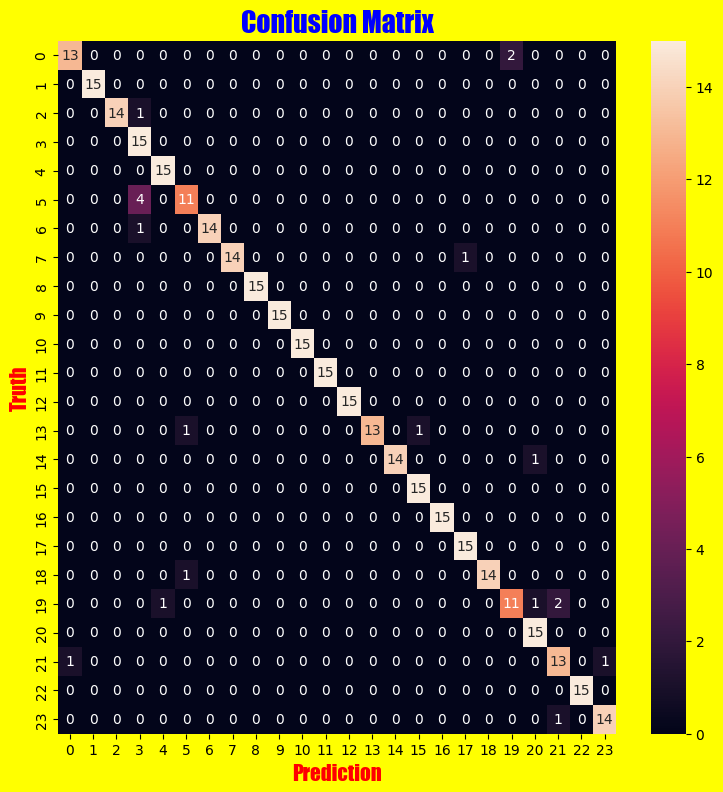

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn

font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

In [42]:
import joblib
joblib.dump(scaler,'minMaxScaler')
joblib.dump(model,"symptomToDisease")
joblib.dump(df,'symptomToDiseaseDF')

['symptomToDiseaseDF']

In [41]:
dict_df=df[['label','label_num']].drop_duplicates(subset=['label', 'label_num'])
dict_df[dict_df['label_num']==15]['label']

750    Cervical spondylosis
Name: label, dtype: object

In [19]:
scaler=joblib.load("minMaxScaler")
model=joblib.load("symptomToDisease")

In [34]:
query="i am suffering from fever, have some cough and body pain."

preProcessed_query=preprocess(query)
vector_query=[nlp(preProcessed_query).vector]

test_df=pd.DataFrame([vector_query],columns=['vector'])

test_df_2d=np.stack(test_df['vector'])

# print(test_df_2d)

test_df_scaled=scaler.transform(test_df_2d)

ans=model.predict(test_df_scaled)

ans[0]

15